## DJC - Shannon equation calculations for beta stim paper

### 1. Cogan SF, Ludwig KA, Welle CG, Takmakov P. Tissue damage thresholds during therapeutic electrical stimulation. J Neural Eng. 2016;13(2):21001. doi:10.1088/1741-2560/13/2/021001.

### shannon equation
### $log(D) = k - log(Q)$
### $k = 1.85$
### charge density = D, charge per phase = Q 

### we are in the macro region according to the article (> 30 micron diamater) 

### exposed diameter = 1.75 mm, so 0.175 cm

### max current was 4000 uA = 4000e-6 A

### time per phase, 5 ms, so 5e-3 s

### tissue damage threshold of $30 \mu C/cm^{2}$

In [10]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()
sns.set_style("whitegrid")




r = 0.15/2
area = np.pi*(r**2)

max_current = 2000
time_per_phase = 500e-6

charge_per_phase= max_current*time_per_phase
print('the charge per phase is {} uC'.format(charge_per_phase))

# look at log10 like 2016 paper 
print('the charge per phase is {} log10 uC'.format(np.log10(charge_per_phase)))

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/area

print('the charge density is {} uC/cm^2'.format(charge_density))

# look at log10 

print ('the charge per phase is {} log10 uC/cm^2'.format(np.log10(charge_density)))


current = np.array([2000])
pulse_width = np.array([100e-6, 200e-6, 500e-6, 1000e-6])

meshed_grid_x, meshed_grid_y = np.meshgrid(pulse_width,current)

charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/area

log_charge_density = np.log10(charge_density)
log_charge_density = np.log10(charge_density)
log_charge_per_phase = np.log10(charge_per_phase)
# shannon 
k = 1.85
q = np.arange(-1, 1.51,0.1)
d = (1.85-(q))

the charge per phase is 1.0 uC
the charge per phase is 0.0 log10 uC
the charge density is 56.58842421045168 uC/cm^2
the charge per phase is 1.7527276005224661 log10 uC/cm^2


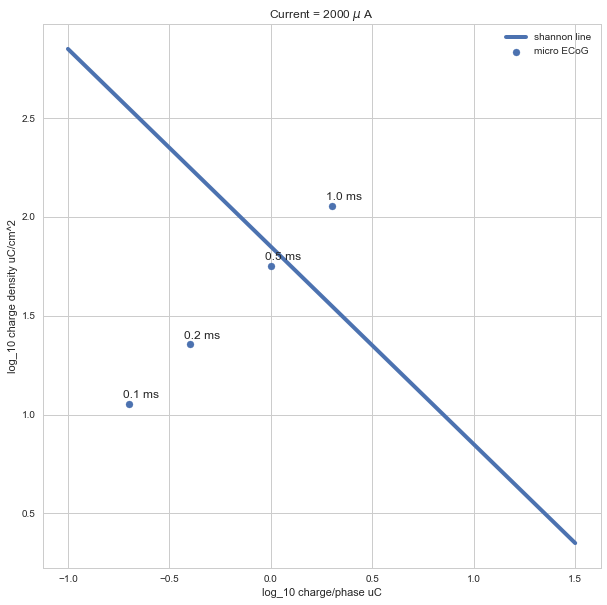

In [11]:
flat_log_d = np.ndarray.flatten(log_charge_density)
flat_log_c = np.ndarray.flatten(log_charge_per_phase)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(flat_log_c,flat_log_d,label='micro ECoG')
for i, txt in enumerate(pulse_width):
   ax.annotate(str(1e3*txt ) + ' ms', (flat_log_c[i]-.03,flat_log_d[i]+.03))
    

plt.plot(q,d,linewidth=4,label='shannon line')
plt.ylabel('log_10 charge density uC/cm^2')
plt.xlabel('log_10 charge/phase uC')
plt.title(r'Current = {} $\mu$ A'.format(current[0]))
plt.legend()
plt.show()

In [4]:
charge_density

array([[  22.63536968,   45.27073937,  113.17684842,  226.35369684]])

In [50]:
np.log10(30)

1.4771212547196624

In [6]:
current

array([4000])